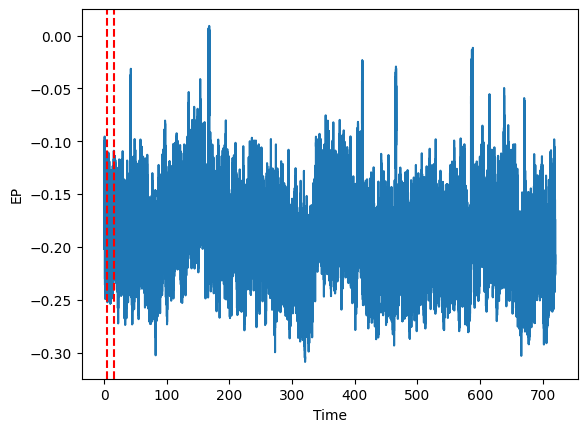

In [51]:
# PLot for Phytonode P2: control

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Final/RED/Measurements/P2/P2_2024-02-26 12_00_00_001.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)
start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0


#plt.plot(sampled_data["timestamp"], sampled_data["differential_potential"])
plt.plot(data["time_passed"], data["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show() 

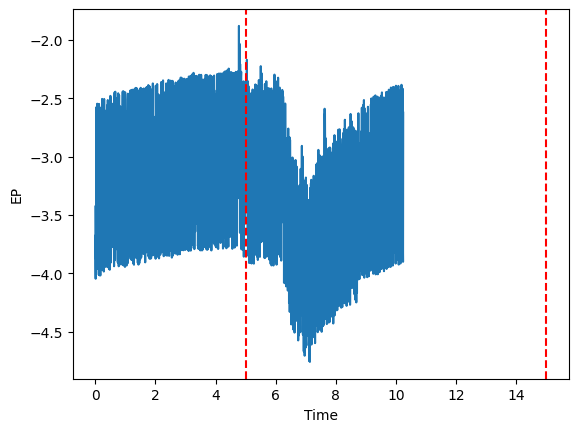

In [9]:
# PLot for Phytonode P5: leaf-stem

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Wind_test/Measurements/P5/P5_2024-03-06 17:50:45:135.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)

start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0
sampled = data.iloc[::100,:]

plt.plot(sampled["time_passed"], sampled["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show() 

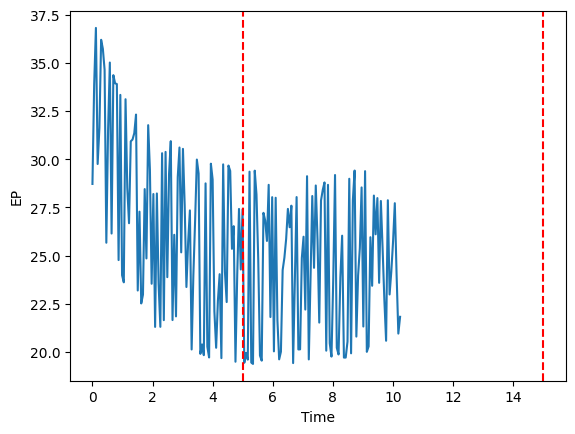

In [10]:
# PLot for Phytonode P9: stem-stem

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Wind_test/Measurements/P9/P9_2024-03-06 17:50:45:106.csv')

datetime_format = '%Y-%m-%d %H:%M:%S:%f'
data['timestamp'] = pd.to_datetime(data['timestamp'], format=datetime_format)
start_time = data['timestamp'].min()
data['time_passed'] = (data['timestamp'] - start_time).dt.total_seconds() / 60.0
sampled = data.iloc[::100, :]

#plt.plot(sampled_data["timestamp"], sampled_data["differential_potential"])
plt.plot(sampled["time_passed"], sampled["differential_potential"])
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=15, color='r', linestyle='--')

plt.xlabel("Time")
plt.ylabel("EP")
plt.show()

               timestamp  light-external  differential_potential_CH1  \
1666 2024-02-28 16:40:01           53981                      467346   
1667 2024-02-28 16:40:11           53976                      461788   
1668 2024-02-28 16:40:21           53975                      468283   
1669 2024-02-28 16:40:31           53975                      461409   
1670 2024-02-28 16:40:41           53968                      467487   
...                  ...             ...                         ...   
2436 2024-02-28 18:49:20           51693                      466201   
2437 2024-02-28 18:49:29           51700                      463349   
2438 2024-02-28 18:49:39           51721                      470243   
2439 2024-02-28 18:49:49           51698                      465175   
2440 2024-02-28 18:49:59           51692                      464710   

      differential_potential_CH2  transpiration  time_passed  
1666                      582186           3432     0.016667  
1667     

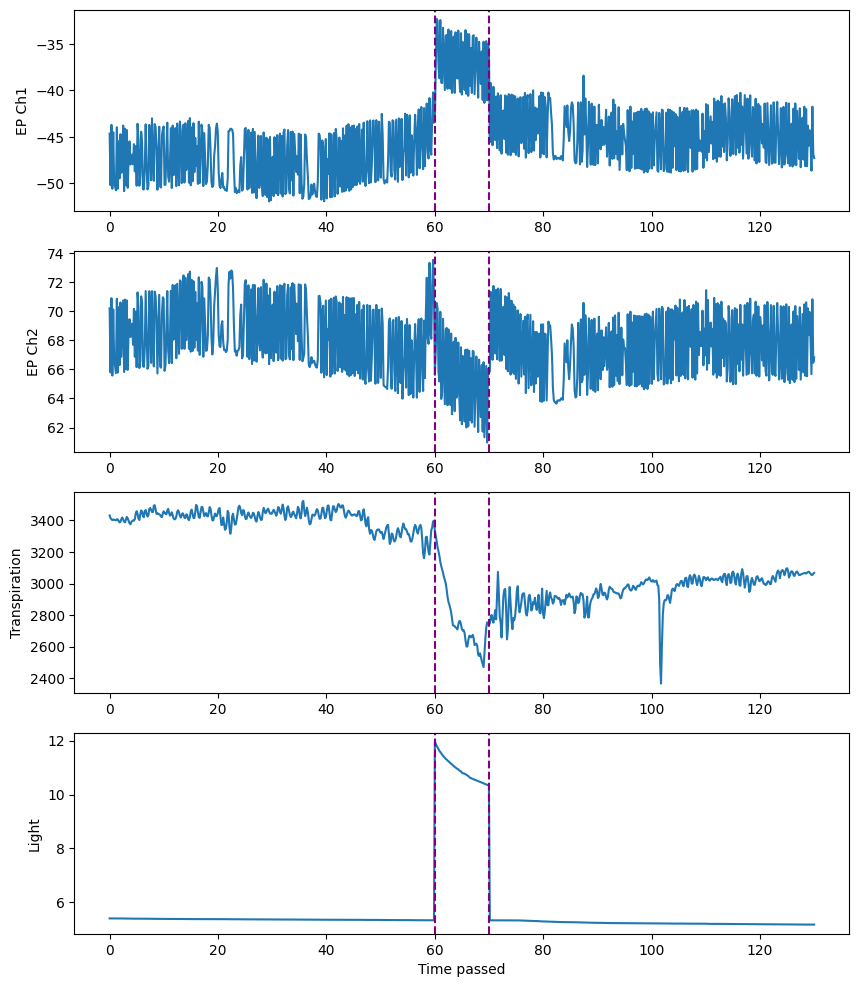

In [15]:
# Plot for light CYBRES

import pandas as pd
import matplotlib.pyplot as plt
data_cybres = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Final/RED/measurements/ttyACM0_2024_02_28-12_00_09.csv')

data_cybres = data_cybres.drop(["sender_hostname", "MU_MM", "MU_ID", "mag_X", "mag_Y", "mag_Z", "temp-PCB", "RF_power_emission", "air_pressure", "soil_moisture", "soil_temperature", "temp-external", "humidity-external"], axis=1)


datetime_format = '%Y-%m-%d %H:%M:%S'
data_cybres['timestamp'] = pd.to_datetime(data_cybres['timestamp'], format=datetime_format)
start_time = pd.Timestamp('2024-02-28 16:40:00')
end_time = pd.Timestamp('2024-02-28 18:50:00')
filtered_data = data_cybres[(data_cybres['timestamp'] >= start_time) & (data_cybres['timestamp'] <= end_time)].copy()
filtered_data.loc[:, 'time_passed'] = (filtered_data['timestamp'] - start_time).dt.total_seconds() / 60.0

print(filtered_data)


fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=False)

axes[0].plot(filtered_data["time_passed"], (filtered_data["differential_potential_CH1"]-512000) / 1000)
axes[0].set_ylabel("EP Ch1")

axes[1].plot(filtered_data["time_passed"], (filtered_data["differential_potential_CH2"]-512000) / 1000)
axes[1].set_ylabel("EP Ch2")

axes[2].plot(filtered_data["time_passed"], filtered_data["transpiration"])
axes[2].set_ylabel("Transpiration")

axes[3].plot(filtered_data["time_passed"], filtered_data["light-external"]/10000)
axes[3].set_ylabel("Light")


for i in range(0,4):
    axes[i].axvline(x=60, color='purple', linestyle='--')
    axes[i].axvline(x=70, color='purple', linestyle='--')
    #axes[i].axvline(x=210, color='r', linestyle='--')
    #axes[i].axvline(x=220, color='r', linestyle='--')
    #axes[i].axvline(x=340, color='r', linestyle='--')
    #axes[i].axvline(x=350, color='r', linestyle='--')

axes[-1].set_xlabel("Time passed")
plt.savefig('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/redlight_CYBRES.pdf', format='pdf')
#plt.show()


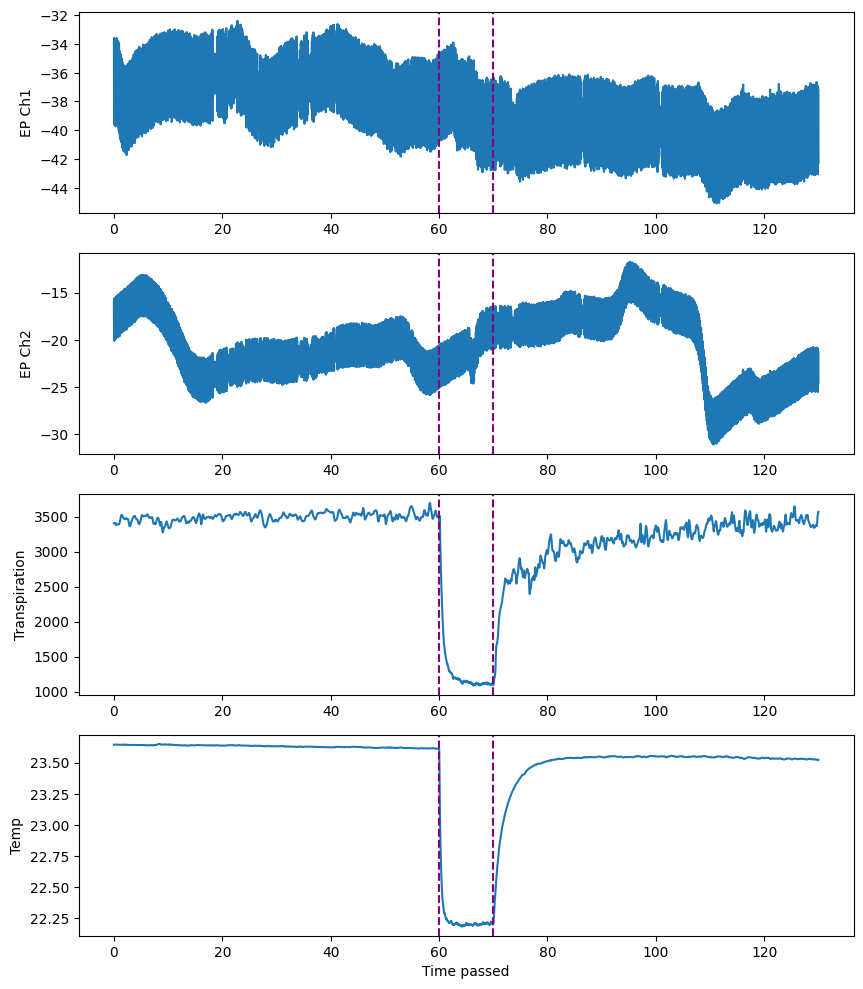

In [25]:
# Plot for heat CYBRES

import pandas as pd
import matplotlib.pyplot as plt


data_cybres = pd.read_csv('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/CSV/Final/WIND/measurements/ttyACM0_2024_03_16-12_00_01.csv')
data_cybres = data_cybres.drop(["sender_hostname", "MU_MM", "MU_ID", "mag_X", "mag_Y", "mag_Z", "temp-PCB", "RF_power_emission", "air_pressure", "soil_moisture", "soil_temperature", "light-external", "humidity-external"], axis=1)

datetime_format = '%Y-%m-%d %H:%M:%S'
data_cybres['timestamp'] = pd.to_datetime(data_cybres['timestamp'], format=datetime_format)
start_time = pd.Timestamp('2024-03-16 16:40:00')
end_time = pd.Timestamp('2024-03-16 18:50:00')
filtered_data = data_cybres[(data_cybres['timestamp'] >= start_time) & (data_cybres['timestamp'] <= end_time)].copy()
filtered_data.loc[:, 'time_passed'] = (filtered_data['timestamp'] - start_time).dt.total_seconds() / 60.0


fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=False)

axes[0].plot(filtered_data["time_passed"], (filtered_data["differential_potential_CH1"]-512000) / 1000)
axes[0].set_ylabel("EP Ch1")

axes[1].plot(filtered_data["time_passed"], (filtered_data["differential_potential_CH2"]-512000) / 1000)
axes[1].set_ylabel("EP Ch2")

axes[2].plot(filtered_data["time_passed"], filtered_data["transpiration"])
axes[2].set_ylabel("Transpiration")

axes[3].plot(filtered_data["time_passed"], filtered_data["temp-external"]/10000)
axes[3].set_ylabel("Temp")

for i in range(0,4):
    axes[i].axvline(x=60, color='purple', linestyle='--')
    axes[i].axvline(x=70, color='purple', linestyle='--')

axes[-1].set_xlabel("Time passed")
#plt.savefig('/home/basti/DATEN/Universität/Bachelor/Projekt/Bachelor-Pr/Results/heat_CYBRES.pdf', format='pdf')
plt.show()
